In [1]:
#1 Préparer son data set
#1.1 Supprimer les anomalies, erreurs pour ne pas biaiser l'apprentissage de la machine
#1.2 Normaliser les données (mettre sur une même échelle)
#1.3 Si valeurs manquantes, assigner une valeur par défault
#1.4 Features catégoricales, les convertir en binaire (0,1)
#1.5 Nettoyer les features redondantes (fortes corrélations)
#1.6 créer des nouveaux features (features engineering)


In [4]:
#2 Charger un fichier excel dans Jupyter
import pandas as pd
Dataset = pd.read_csv('dataset.csv') #changer par le nom du fichier
print(Dataset.head()) # afficher le Dataset

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [5]:
#3 Nettoyer et convertir les catégories en valeurs numériques
Dataset = Dataset.fillna(value=99999) # assigner une valeur défaut
Dataset = pd.get_dummies(Dataset) # remplacer les catégories
y = Dataset['prix'].values # Créer le vecteur target y
X = Dataset.drop(['prix'], axis=1).values # Créer la matrice features X

NameError: name 'Dataset' is not defined

In [6]:
#4 Over fitting (le modèle s'est trop spécialisé sur les données et a perdu tout sens de généralisation)
#faible coût mais grande variance
#Solution : régularisation

In [8]:
#sans régularisation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

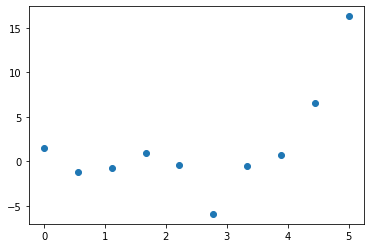

In [9]:
#creation d'un Dataset x, y
np.random.seed(0)
x = np.linspace(0, 5, 10)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-2, 2, 10)
plt.scatter(x, y)

In [10]:
# creation de plusieurs features pour notre modele
X = x[:, np.newaxis]
X = PolynomialFeatures(degree=10, include_bias=False).fit_transform(X)
X.shape

(10, 10)

Coeff R2 = 0.9999999999999998


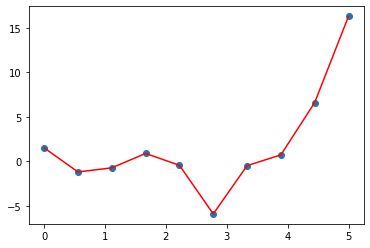

In [11]:
# Entraînement du modele. Ici on utilise les Equations Normales (LinearRegression)
# Les Equations normales reposent sur la méthode des moindres carrées, c’est plus # rapide que le Gradient Descent.
model = LinearRegression()
model.fit(X,y)
print('Coeff R2 =', model.score(X, y))
plt.scatter(x, y, marker='o') 
plt.plot(x, model.predict(X), c='red')

In [12]:
#avec régularisation
from sklearn.linear_model import Ridge

Coeff R2 = 0.9718478025637419


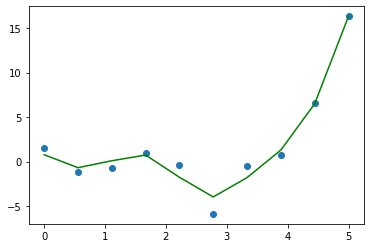

In [17]:
ridge = Ridge(alpha=0.1) # alpha est le facteur de régularisation.
ridge.fit(X,y)
print('Coeff R2 =', ridge.score(X, y))
plt.scatter(x, y, marker='o')
plt.plot(x, ridge.predict(X), c = 'green')

In [18]:
#5 Train set and Test set
#diviser le dataset aléatoirement avec un rapport 80%
#Train set: 80%
#Test set: 20%

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

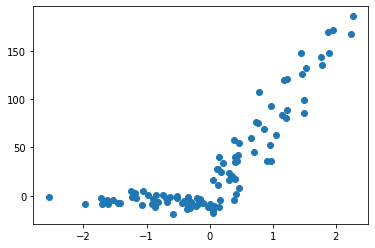

In [47]:
# Creation d'un Dataset Aleatoire
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10) 
y = np.abs(y) + y + np.random.normal(-5, 5, 100)
plt.scatter(x, y)

In [48]:
# Creation des Train set et Test set a partir du Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

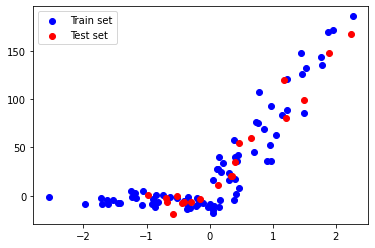

In [49]:
# Visualisation des Train set et Test set
plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.scatter(x_test, y_test, c='red', label='Test set')
plt.legend()

In [50]:
#Code complet
X = PolynomialFeatures(degree = 10, include_bias=False).fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.1, random_state=0)
model.fit(x_train, y_train)

Ridge(alpha=0.1, random_state=0)

Coefficient R2 sur Train set: 0.9301501139168656
Coefficient R2 sur Test set: 0.8788022270682556


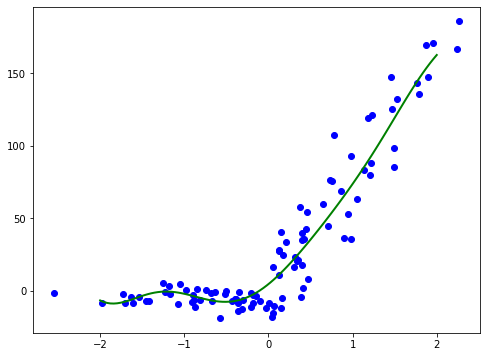

In [52]:
print('Coefficient R2 sur Train set:', model.score(x_train, y_train))
print('Coefficient R2 sur Test set:', model.score(x_test, y_test))
plt.figure(figsize=(8,6))
plt.scatter(x, y, c='blue')
a = np.linspace(-2, 2, 100).reshape((100, 1))
A = PolynomialFeatures(degree = 10, include_bias=False).fit_transform(a)
plt.plot(a, model.predict(A), c = 'green', lw=2)

In [53]:
#Si les erreurs entre le train set et test set sont grandes: under fitting or over fitting